Tarquin Bennett

# Question 1

### 3.6

I chose rule 1c

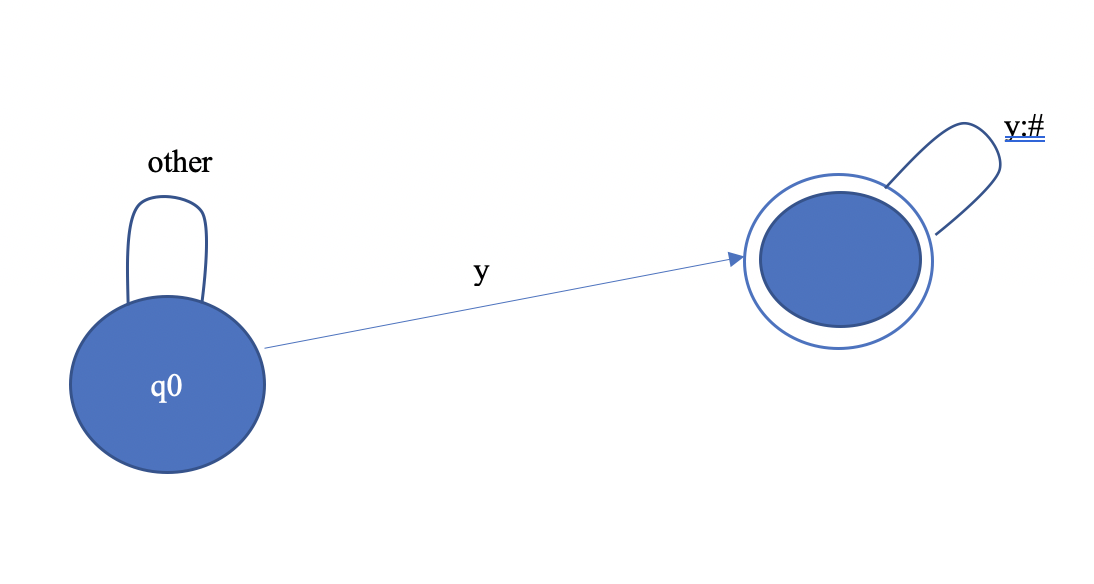

Rule 1c removes y if the stem contains a vowel and replaces it with i. so at the the start state if it is anything other than y we stay in the state and fail if nothing else is there, and moves to the other state if the letter is y and stays there and accepts.

### 3.8

In [29]:
from nltk.corpus import wordnet

def permutations(s):
    if len(s) < 2:
        yield s
    else:
        for sub_string in permutations(s[1:]):
            for i in range(len(s)):
                yield sub_string[:i] + s[0:1] + sub_string[i:]

def anagrams(word):
    for word in permutations(word):
        if wordnet.synsets(word):
            yield word

The above program finds all the permutations of the word given and then sees if any of the permutations are valid words using wordnet. This program sees if the given word has any synonyms to determine if it is real word. 

### 4.3

In [46]:
import nltk
from nltk.util import ngrams
from itertools import islice

def take(n, iterable):
    #from https://stackoverflow.com/questions/7971618/return-first-n-keyvalue-pairs-from-dict
    #return first n items of the iterable as a list
    return list(islice(iterable,n))

c1 = ngrams(nltk.corpus.gutenberg.words('austen-emma.txt'), n=1)
c2 = ngrams(nltk.corpus.gutenberg.words('austen-sense.txt'), n=1)
c3 = ngrams(nltk.corpus.gutenberg.words('austen-emma.txt'), n=2)
c4 = ngrams(nltk.corpus.gutenberg.words('austen-sense.txt'), n=2)

fdist1 = nltk.FreqDist(c1)
fdist2 = nltk.FreqDist(c2)
fdist3 = nltk.FreqDist(c3)
fdist4 = nltk.FreqDist(c4)

for i in take(10,sorted(fdist1.items(), key=lambda x: x[1], reverse=True)):
    print(i)
print()
for i in take(10,sorted(fdist2.items(), key=lambda x: x[1], reverse=True)):
    print(i)
print()
for i in take(10,sorted(fdist3.items(), key=lambda x: x[1], reverse=True)):
    print(i)
print()
for i in take(10, sorted(fdist4.items(), key=lambda x: x[1], reverse=True)):
    print(i)

((',',), 11454)
(('.',), 6928)
(('to',), 5183)
(('the',), 4844)
(('and',), 4672)
(('of',), 4279)
(('I',), 3178)
(('a',), 3004)
(('was',), 2385)
(('her',), 2381)

((',',), 9397)
(('to',), 4063)
(('.',), 3975)
(('the',), 3861)
(('of',), 3565)
(('and',), 3350)
(('her',), 2436)
(('a',), 2043)
(('I',), 2004)
(('in',), 1904)

((',', 'and'), 1879)
(('Mr', '.'), 1153)
(("'", 's'), 932)
((';', 'and'), 866)
(('."', '"'), 757)
(('Mrs', '.'), 699)
(('to', 'be'), 595)
(('.', 'I'), 570)
((',', 'I'), 568)
(('of', 'the'), 556)

((',', 'and'), 1598)
(("'", 's'), 700)
((';', 'and'), 605)
(('Mrs', '.'), 529)
(('of', 'the'), 430)
(('to', 'be'), 428)
(('."', '"'), 428)
((',', '"'), 392)
(('.', '"'), 369)
(('in', 'the'), 348)


The 10 most common unigrams between the two works almost the same. The difference between first work and second work is the first work has 'was' while the second has 'in'. This is to be expected because the most common words in written pieces are articles and pronouns.

When it comes to the bigrams, for the first corpora the frequency distribution is more distributed among the top 10, then the second corpora where the first entry has double the frequency of the second. After that, it is a more steady decline. 

# Question 2 

### Your Turn 1

Senses of the word dish: a vessel of which food is served, food prepared in a particular way, present something, discuss something publicly

In [52]:
from nltk.corpus import wordnet as wn

In [63]:
wn.synsets('dish')

[Synset('dish.n.01'),
 Synset('dish.n.02'),
 Synset('dish.n.03'),
 Synset('smasher.n.02'),
 Synset('dish.n.05'),
 Synset('cup_of_tea.n.01'),
 Synset('serve.v.06'),
 Synset('dish.v.02')]

In [77]:
wn.synset('dish.n.03').lemmas()

[Lemma('dish.n.03.dish'), Lemma('dish.n.03.dishful')]

In [78]:
wn.lemma('dish.n.03.dishful')

Lemma('dish.n.03.dishful')

In [79]:
wn.lemma('dish.n.03.dishful').synset()

Synset('dish.n.03')

In [80]:
wn.lemma('dish.n.03.dishful').name()

'dishful'

This shows the connection between words which is helpful when figuring out what people mean when they say the word.

### Your Turn 2

Dish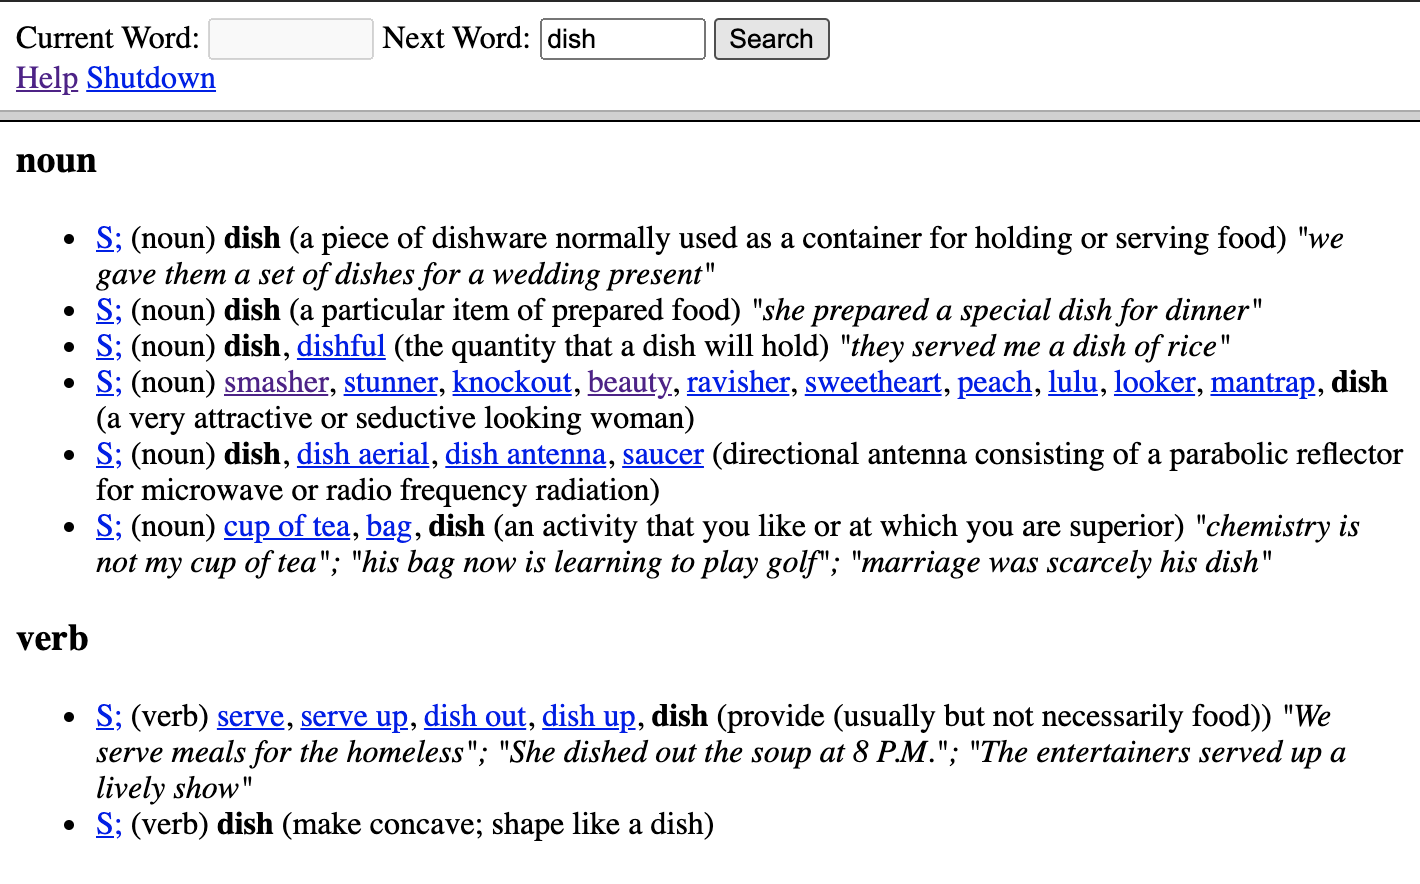

smasher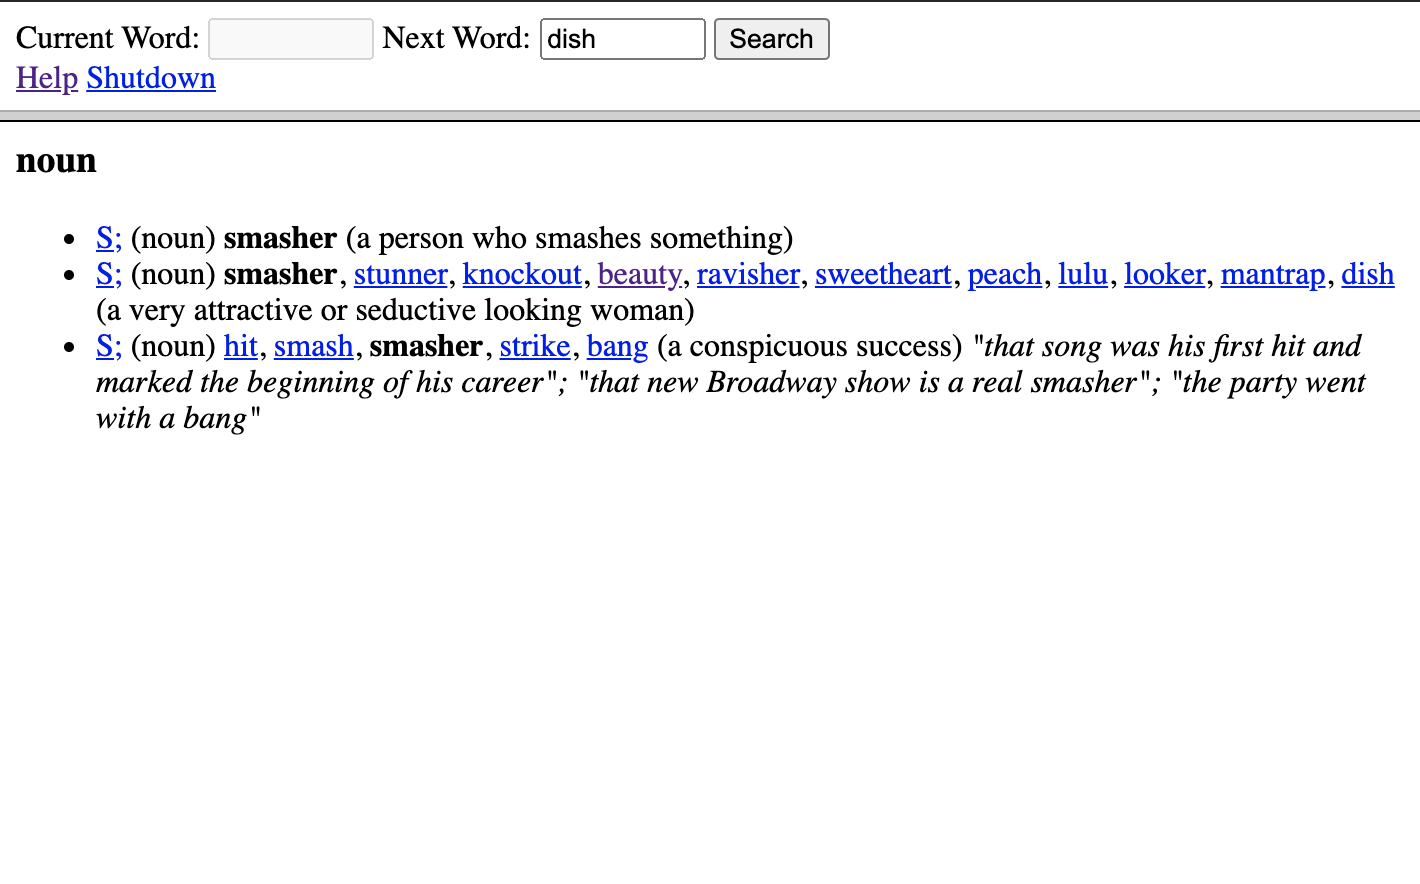

looker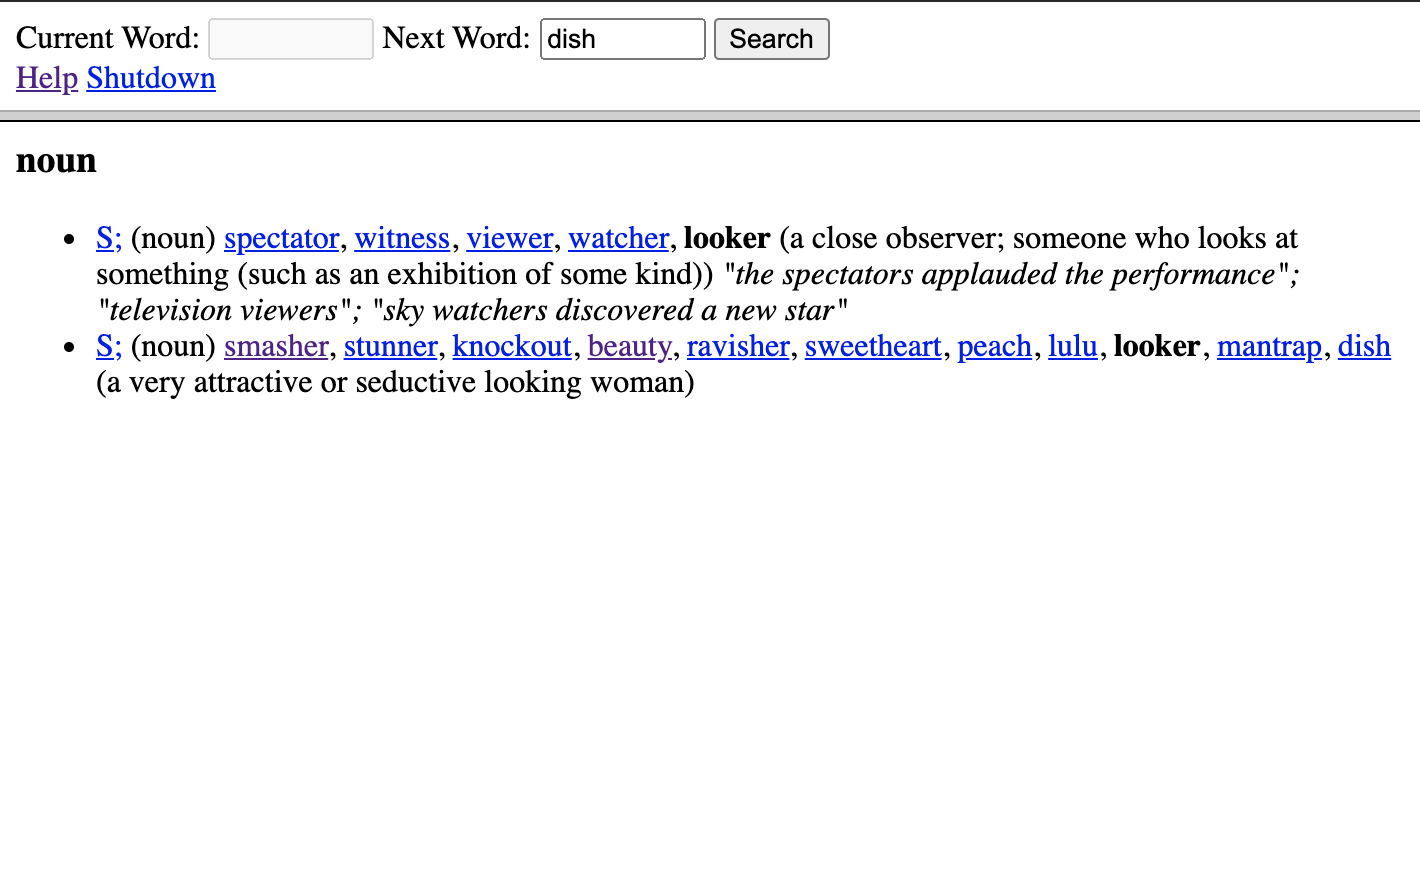

This is a great graphic tool that lets you follow the WordNet hierarchy graphically instead of with text.

### 2.8.5

In [103]:
house = wn.synset('house.n.01')
animal = wn.synset('animal.n.01')
cow = wn.synset('cow.n.01')

print(animal.member_meronyms())
print(animal.part_meronyms())
print(animal.substance_meronyms())
print(animal.member_holonyms())
print(animal.part_holonyms())
print(animal.substance_holonyms())
print()
print(house.member_meronyms())
print(house.part_meronyms())
print(house.substance_meronyms())
print(house.member_holonyms())
print(house.part_holonyms())
print(house.substance_holonyms())
print()
print(cow.member_meronyms())
print(cow.part_meronyms())
print(cow.substance_meronyms())
print(cow.member_holonyms())
print(cow.part_holonyms())
print(cow.substance_holonyms())

[]
[Synset('face.n.07'), Synset('head.n.01')]
[Synset('animal_tissue.n.01')]
[Synset('animalia.n.01')]
[]
[]

[]
[Synset('library.n.01'), Synset('loft.n.02'), Synset('porch.n.01'), Synset('study.n.05')]
[]
[]
[]
[]

[]
[Synset('poll.n.03'), Synset('udder.n.01')]
[]
[]
[]
[]


The more general the noun the more relations you get. 

### 2.8.14

In [129]:
def supergloss(s):
    lst=[s.name(), s.definition()]
    hypernyms = s.hypernyms()
    hyponyms = s.hyponyms()
    
    for h in hypernyms:
        lst.append(h.name())
        lst.append(h.definition())
    for h in hyponyms:
        lst.append(h.name())
        lst.append(h.definition())
    
    return ', '.join(lst)

In [130]:
supergloss(wn.synset('animal.n.01'))

"animal.n.01, a living organism characterized by voluntary movement, organism.n.01, a living thing that has (or can develop) the ability to act or function independently, acrodont.n.01, an animal having teeth consolidated with the summit of the alveolar ridge without sockets, adult.n.02, any mature animal, biped.n.01, an animal with two feet, captive.n.02, an animal that is confined, chordate.n.01, any animal of the phylum Chordata having a notochord or spinal column, creepy-crawly.n.01, an animal that creeps or crawls (such as worms or spiders or insects), critter.n.01, a regional term for `creature' (especially for domestic animals), darter.n.02, a person or other animal that moves abruptly and rapidly, domestic_animal.n.01, any of various animals that have been tamed and made fit for a human environment, embryo.n.02, an animal organism in the early stages of growth and differentiation that in higher forms merge into fetal stages but in lower forms terminate in commencement of larval

this function is useful because it returns the whole hypernym and hyponym tree in a string format. this can then be used to run analysis on.

### 2.8.27

In [156]:
total = 0
count = 0


for synset in wn.all_synsets('v'):
    for lemma in synset.lemmas():
        name = lemma.name()
        total += len(wn.synsets(name, 'v'))
        count += 1

print(total/count)

5.098255280073462


This means that the avgerage polysemy, or sense, of all the verbs according to WordNet is about 5. That means any given word has 5 senses.

# Question 3

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [47]:
def longestSent(book):
    sentEnders = ['.','!','?']
    lst = [w for w in book]
    totalCount=[]
    currCount=0
    currSent=[]
    for i in lst:
        if i in sentEnders:
            totalCount.append((currCount,currSent))
            currCount, currSent = 0,[]
        else:
            currCount+=1
            currSent.append(i)
    return max(totalCount)

In [48]:
longestSent(text1)

(453,
 ['Though',
  'in',
  'many',
  'natural',
  'objects',
  ',',
  'whiteness',
  'refiningly',
  'enhances',
  'beauty',
  ',',
  'as',
  'if',
  'imparting',
  'some',
  'special',
  'virtue',
  'of',
  'its',
  'own',
  ',',
  'as',
  'in',
  'marbles',
  ',',
  'japonicas',
  ',',
  'and',
  'pearls',
  ';',
  'and',
  'though',
  'various',
  'nations',
  'have',
  'in',
  'some',
  'way',
  'recognised',
  'a',
  'certain',
  'royal',
  'preeminence',
  'in',
  'this',
  'hue',
  ';',
  'even',
  'the',
  'barbaric',
  ',',
  'grand',
  'old',
  'kings',
  'of',
  'Pegu',
  'placing',
  'the',
  'title',
  '"',
  'Lord',
  'of',
  'the',
  'White',
  'Elephants',
  '"',
  'above',
  'all',
  'their',
  'other',
  'magniloquent',
  'ascriptions',
  'of',
  'dominion',
  ';',
  'and',
  'the',
  'modern',
  'kings',
  'of',
  'Siam',
  'unfurling',
  'the',
  'same',
  'snow',
  '-',
  'white',
  'quadruped',
  'in',
  'the',
  'royal',
  'standard',
  ';',
  'and',
  'the',
  

By our definition of a sentence, the longest sentence in Moby Dick is 453 words. This of course is not the real longest sentence because we do not take into a count all the sentence definitions and what makes a sentence. However this number is probably close to the true number.

# Question 4

Lexical diversity measures how many times each word is used on average. Perplexity means that the higher the probability of a sequence of words in a sentence that lower the perplexity. So the more often a sequence of words occurs in a text the less perplex it is to the model. This means that the probability of a certain sequence is high enough that it can be guessed with a certain level of accuracy. This is helpful for predicting words. There is a relationship between these two. Lexical diversity shows us a probability of each word being used based on the average times the words are used, so the higher the probability the lower the perplexity of the sequence. Because these are inverses of each other, and sequences are random variables, the probability of a particular event happening can be derived from them. Therefore there is a relationship to the notion of information content.